   # hapPyness: Project One 
 Team Boa 
       (Aashita, 
       Alannah,
       Ben,
       and Brian)

Charles Schulz once said that “happiness is a warm puppy”. According to Walt Disney, “happiness is a state of mind” and author, Tom Bodett, offered that "a person needs just three things to be truly happy in this world: Someone to love, something to do, and something to hope for.” For many, happiness is hard to quantify. However, in 2012 the first World Happiness Report was published based on Gallup poll data. This report uses six factors to measure happiness: economic production, social support, life expectancy, freedom, absence of corruption, and generosity. (Tom may have been on to something.)

Our team will be analyzing this data to determine correlations between metrics (such as the relationship between GDP per capita and the happiness index, and life expectancy vs freedom) and across years. We will also focus on the position of the United States on the list, seeing just how we measure up to the happiest and uphappiest nations to start, then going on to further analyze the metrics to see what story they tell. It will also be interesting to see how 2020 measures up to years prior, considering the Covid-19 pandemic, widespread social unrest, and the general consensus that it was a terrible year.

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import gmaps
import os
import pprint
import requests
import json
import gmaps.datasets
from api_keys import g_key
print(plt.style.available)
plt.style.use('fivethirtyeight')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [2]:
# Store csv file paths in variables
path_2016 = "../Resources/clean_data_2016.csv"
path_2017 = "../Resources/clean_data_2017.csv"
path_2018 = "../Resources/clean_data_2018.csv"
path_2019 = "../Resources/clean_data_2019.csv"
path_2020 = "../Resources/clean_data_2020.csv"
path_all_years = "../Resources/clean_data_all_years.csv"
path_lat_longs = "data_files/lat_lng.csv"

In [3]:
# Import data from csv files
clean_data_2016_df = pd.read_csv(path_2016)
clean_data_2017_df = pd.read_csv(path_2017)
clean_data_2018_df = pd.read_csv(path_2018)
clean_data_2019_df = pd.read_csv(path_2019)
clean_data_2020_df = pd.read_csv(path_2020)
clean_data_all_years_df = pd.read_csv(path_all_years)
country_lat_longs = pd.read_csv(path_lat_longs)

# Alannah

My objective is to look at the average of each metric for each country over the 5 year period to examine if there is a correlation between metrics. I am first focusing on the top 5 and bottom 5 countries. I will then proceed to compare the average scores for 2016-2019 with the 2020 data, to see if the data coincides with the general consenus that 2020 was a terrible year. Finally, I am plotting markers for the top 5 and bottom 5 countries on a map to display whether or not geographic position has any relationship with happiness. 

In [4]:
clean_data_all_years_df.drop(columns="Unnamed: 0", inplace=True)

In [5]:
clean_data_all_years_df

,Country,Happiness Score,GDP per Capita,Social Support,Health/Life Expectancy,Freedom to Make Choices,Generosity,Perceptions of Gov’t Corruption,Year
0,Denmark,7.5260,1.441780,1.163740,0.795040,0.579410,0.361710,0.444530,2016
1,Switzerland,7.5090,1.527330,1.145240,0.863030,0.585570,0.280830,0.412030,2016
2,Iceland,7.5010,1.426660,1.183260,0.867330,0.566240,0.476780,0.149750,2016
3,Norway,7.4980,1.577440,1.126900,0.795790,0.596090,0.378950,0.357760,2016
4,Finland,7.4130,1.405980,1.134640,0.810910,0.571040,0.254920,0.410040,2016
...,...,...,...,...,...,...,...,...,...
700,Tanzania,3.4762,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881,2020
701,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,2020
702,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,2020
703,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,2020


In [6]:
# Finding the mean of each metric for all countries 
mean_countries_all_years = clean_data_all_years_df.groupby("Country").mean()

In [7]:
mean_countries_all_years

,Happiness Score,GDP per Capita,Social Support,Health/Life Expectancy,Freedom to Make Choices,Generosity,Perceptions of Gov’t Corruption,Year
Country,,,,,,,,
Afghanistan,3.31118,0.353291,0.420469,0.247248,0.071096,0.221757,0.038901,2018
Albania,4.69734,0.944229,0.760160,0.794312,0.392821,0.173548,0.035447,2018
Algeria,5.54762,1.013876,1.087262,0.690609,0.138068,0.077358,0.137171,2018
Argentina,6.33954,1.106026,1.355823,0.773404,0.495840,0.083490,0.059423,2018
Armenia,4.45856,0.847144,0.942366,0.707042,0.251950,0.088129,0.051891,2018
...,...,...,...,...,...,...,...,...
Venezuela,5.18004,0.997668,1.341781,0.693042,0.182237,0.062940,0.062031,2018
Vietnam,5.15330,0.740602,1.206547,0.737175,0.588486,0.189241,0.089008,2018
Yemen,3.51588,0.458555,0.964758,0.368312,0.221777,0.097605,0.068808,2018


In [8]:
# Ordering the data from happiest to least happy.  
avg_happiness_over_all_years = mean_countries_all_years.sort_values("Happiness Score", axis=0, ascending=False, inplace=False)
avg_happiness_over_all_years

,Happiness Score,GDP per Capita,Social Support,Health/Life Expectancy,Freedom to Make Choices,Generosity,Perceptions of Gov’t Corruption,Year
Country,,,,,,,,
Finland,7.61834,1.355948,1.470683,0.888268,0.625662,0.203015,0.411302,2018
Denmark,7.56972,1.397022,1.476262,0.886188,0.629091,0.299157,0.431712,2018
Norway,7.53420,1.512422,1.463919,0.897906,0.638143,0.317189,0.357765,2018
Switzerland,7.50598,1.471017,1.441911,0.948139,0.613319,0.271887,0.377397,2018
Iceland,7.49970,1.391359,1.521880,0.928345,0.624677,0.404330,0.140763,2018
...,...,...,...,...,...,...,...,...
Rwanda,3.40806,0.346290,0.738289,0.446292,0.584026,0.228196,0.460194,2018
Tanzania,3.40504,0.474170,0.913379,0.408837,0.422992,0.297303,0.112981,2018
Afghanistan,3.31118,0.353291,0.420469,0.247248,0.071096,0.221757,0.038901,2018


In [9]:
# Data for Top 5 bar chart
avg_top_5_countries = avg_happiness_over_all_years.iloc[0:5]
avg_top_5_countries 

,Happiness Score,GDP per Capita,Social Support,Health/Life Expectancy,Freedom to Make Choices,Generosity,Perceptions of Gov’t Corruption,Year
Country,,,,,,,,
Finland,7.61834,1.355948,1.470683,0.888268,0.625662,0.203015,0.411302,2018
Denmark,7.56972,1.397022,1.476262,0.886188,0.629091,0.299157,0.431712,2018
Norway,7.53420,1.512422,1.463919,0.897906,0.638143,0.317189,0.357765,2018
Switzerland,7.50598,1.471017,1.441911,0.948139,0.613319,0.271887,0.377397,2018
Iceland,7.49970,1.391359,1.521880,0.928345,0.624677,0.404330,0.140763,2018


In [10]:
columns = avg_top_5_countries.columns[1:7]
labels = ['Finland', 'Denmark', 'Norway', 'Switzerland', 'Iceland']

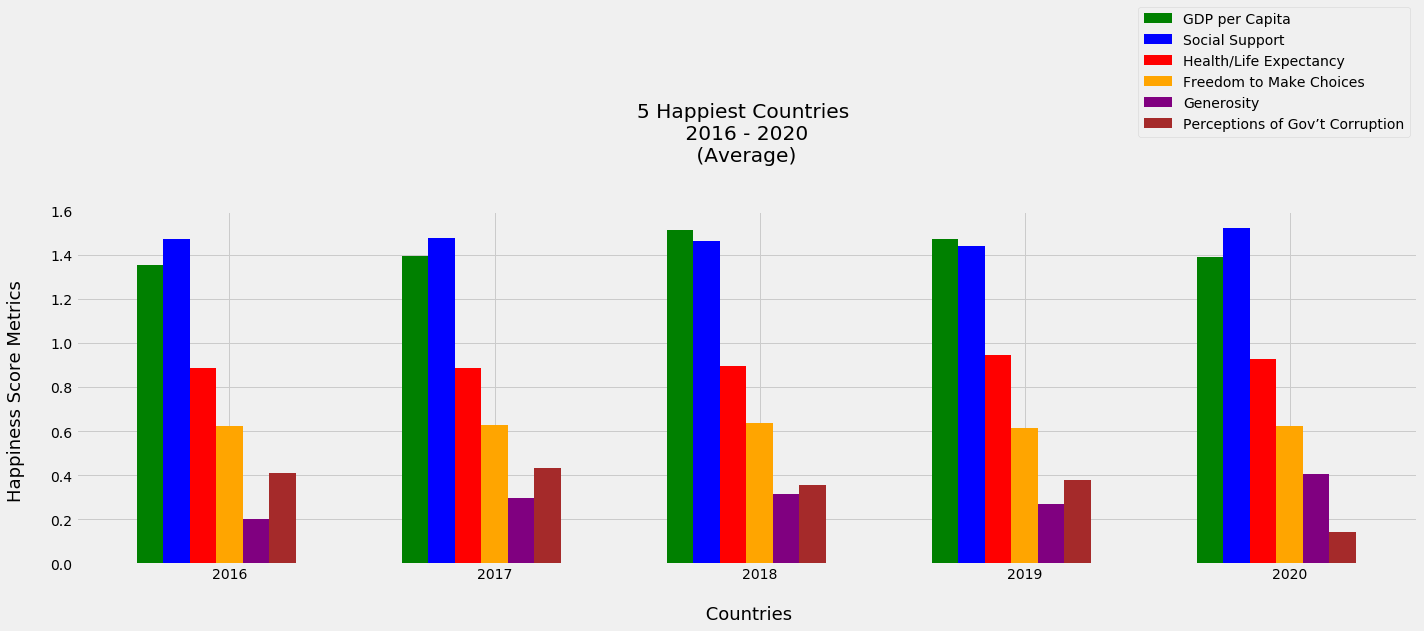

In [48]:
x = np.arange(5)

plt.figure(figsize=(20,8))
plt.bar(x + 0.1, avg_top_5_countries["GDP per Capita"], color = 'green', width = 0.1)
plt.bar(x + 0.2, avg_top_5_countries["Social Support"], color = 'blue', width = 0.1)
plt.bar(x + 0.3, avg_top_5_countries["Health/Life Expectancy"], color = 'red', width = 0.1)
plt.bar(x + 0.4, avg_top_5_countries["Freedom to Make Choices"], color = 'orange', width = 0.1)
plt.bar(x + 0.5, avg_top_5_countries["Generosity"], color = 'purple', width = 0.1)
plt.bar(x + 0.6, avg_top_5_countries["Perceptions of Gov’t Corruption"], color = 'brown', width = 0.1)

plt.legend(labels=columns, loc='upper right', bbox_to_anchor=(1.0, 1.3))
plt.title("5 Happiest Countries \n 2016 - 2020 \n (Average) \n \n")
plt.xticks(np.arange(0.4, 5), labels=labels)
plt.xlabel("\n Countries", fontsize=18)
plt.ylabel("Happiness Score Metrics \n ", fontsize=18)
plt.ylim(0.0, 1.6)
plt.tight_layout()
plt.legend(labels=columns, loc='upper right', bbox_to_anchor=(1.0, 1.4))
plt.savefig("most_happy.png")
plt.show()

In [12]:
# Data for Bottom 5 bar chart
avg_bottom_5_countries = avg_happiness_over_all_years.iloc[136:141]
avg_bottom_5_countries

,Happiness Score,GDP per Capita,Social Support,Health/Life Expectancy,Freedom to Make Choices,Generosity,Perceptions of Gov’t Corruption,Year
Country,,,,,,,,
Rwanda,3.40806,0.346290,0.738289,0.446292,0.584026,0.228196,0.460194,2018
Tanzania,3.40504,0.474170,0.913379,0.408837,0.422992,0.297303,0.112981,2018
Afghanistan,3.31118,0.353291,0.420469,0.247248,0.071096,0.221757,0.038901,2018
South Sudan,3.26932,0.344654,0.504558,0.200421,0.106258,0.236119,0.111020,2018
Burundi,3.25306,0.059387,0.468358,0.225859,0.132700,0.183947,0.129305,2018


In [13]:
columns = avg_bottom_5_countries.columns[1:7]
labels = ['Rwanda', 'Tanzania', 'Afghanistan', 'South Sudan', 'Burundi']

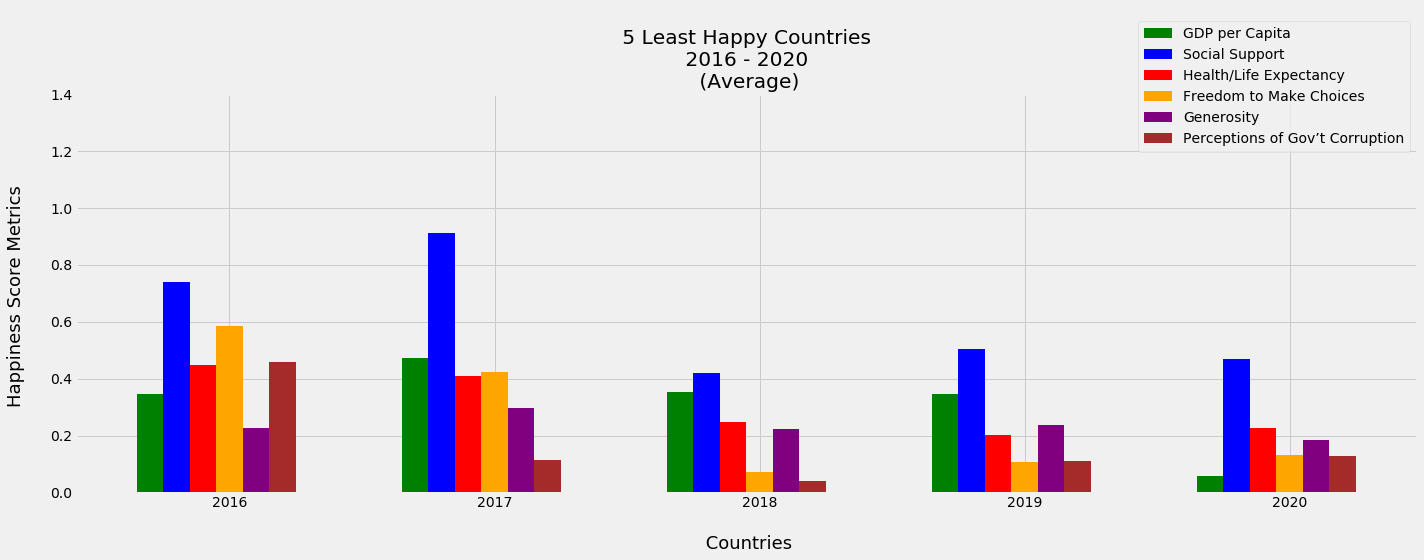

In [50]:
x = np.arange(5)

plt.figure(figsize=(20,8))
plt.bar(x + 0.1, avg_bottom_5_countries["GDP per Capita"], color = 'green', width = 0.1)
plt.bar(x + 0.2, avg_bottom_5_countries["Social Support"], color = 'blue', width = 0.1)
plt.bar(x + 0.3, avg_bottom_5_countries["Health/Life Expectancy"], color = 'red', width = 0.1)
plt.bar(x + 0.4, avg_bottom_5_countries["Freedom to Make Choices"], color = 'orange', width = 0.1)
plt.bar(x + 0.5, avg_bottom_5_countries["Generosity"], color = 'purple', width = 0.1)
plt.bar(x + 0.6, avg_bottom_5_countries["Perceptions of Gov’t Corruption"], color = 'brown', width = 0.1)


plt.title("\n 5 Least Happy Countries \n 2016 - 2020 \n (Average)")
plt.xticks(np.arange(0.4, 5), labels=labels)
plt.xlabel("\n Countries", fontsize=18)
plt.ylabel("Happiness Score Metrics \n ", fontsize=18)
plt.ylim(0.0,1.4)
plt.tight_layout()
plt.legend(labels=columns, loc='upper right', bbox_to_anchor=(1.0, 1.2))
plt.savefig("least_happy.png")
plt.show()

In [15]:
grouped_by_year = clean_data_all_years_df.groupby("Year").mean()
grouped_by_year

,Happiness Score,GDP per Capita,Social Support,Health/Life Expectancy,Freedom to Make Choices,Generosity,Perceptions of Gov’t Corruption
Year,,,,,,,
2016,5.397418,0.957977,0.801332,0.562026,0.372259,0.236302,0.131511
2017,5.404638,0.996435,1.205995,0.563860,0.412895,0.242857,0.119522
2018,5.432844,0.903674,1.232199,0.610014,0.458305,0.177929,0.109307
2019,5.476631,0.923113,1.231078,0.743915,0.394624,0.179950,0.107227
2020,5.528786,0.881150,1.168338,0.704486,0.466835,0.186704,0.130486


In [16]:
columns = grouped_by_year.columns[1:7]
labels = ['2016', '2017', '2018', '2019', '2020']

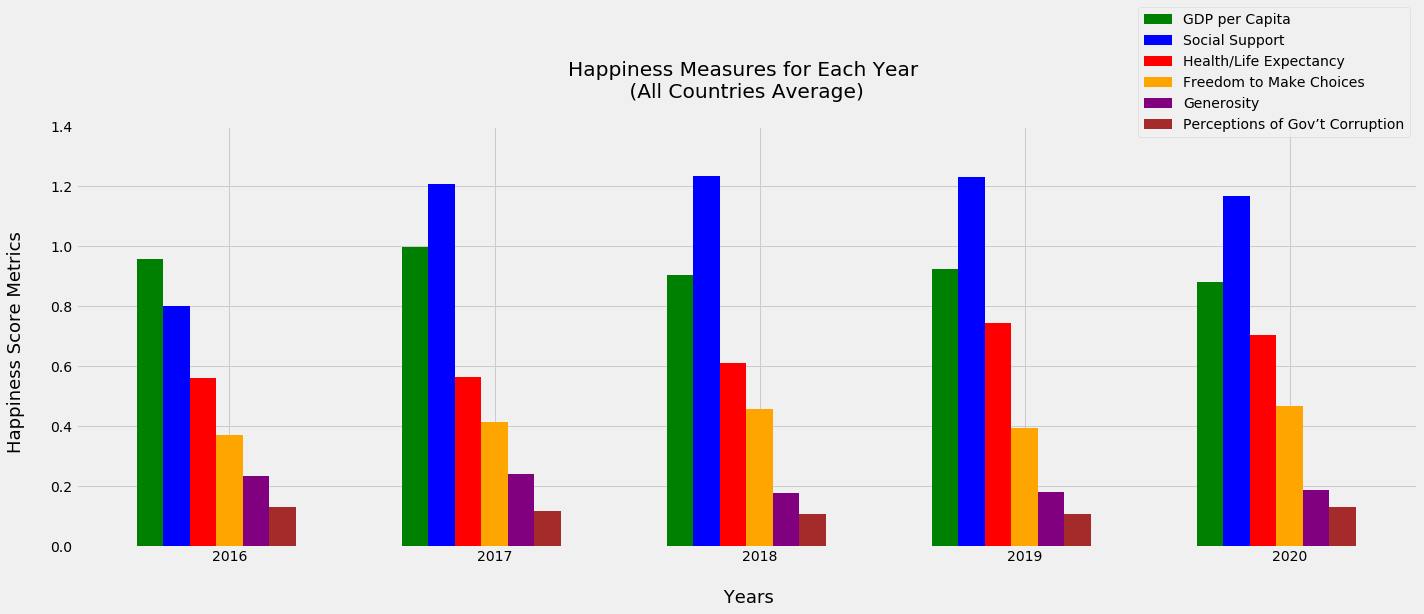

In [52]:
x = np.arange(5)

plt.figure(figsize=(20,8))
plt.bar(x + 0.1, grouped_by_year["GDP per Capita"], color = 'green', width = 0.1)
plt.bar(x + 0.2, grouped_by_year["Social Support"], color = 'blue', width = 0.1)
plt.bar(x + 0.3, grouped_by_year["Health/Life Expectancy"], color = 'red', width = 0.1)
plt.bar(x + 0.4, grouped_by_year["Freedom to Make Choices"], color = 'orange', width = 0.1)
plt.bar(x + 0.5, grouped_by_year["Generosity"], color = 'purple', width = 0.1)
plt.bar(x + 0.6, grouped_by_year["Perceptions of Gov’t Corruption"], color = 'brown', width = 0.1)



plt.title("Happiness Measures for Each Year \n (All Countries Average) \n")
plt.xticks(np.arange(0.4, 5), labels=labels)
plt.xlabel("\n Years", fontsize=18)
plt.ylabel("Happiness Score Metrics  \n ", fontsize=18)
plt.ylim(0.0, 1.4)
plt.tight_layout()
plt.legend(labels=columns, loc='upper right', bbox_to_anchor=(1.0, 1.3))
plt.savefig("average_per_year.png", bbox_inches='tight')
plt.show()

In [18]:
# Creating a dataframe for data from 2016-2019 averaged
sixteen_nineteen_df = clean_data_all_years_df.loc[clean_data_all_years_df["Year"] != 2020]

In [19]:
avg_sixteen_nineteen_df = sixteen_nineteen_df.groupby("Country").mean()
avg_sixteen_nineteen_df = avg_sixteen_nineteen_df.sort_values("Happiness Score", axis=0, ascending=False, inplace=False)
avg_sixteen_nineteen_df

,Happiness Score,GDP per Capita,Social Support,Health/Life Expectancy,Freedom to Make Choices,Generosity,Perceptions of Gov’t Corruption,Year
Country,,,,,,,,
Finland,7.57075,1.373638,1.463472,0.870017,0.616498,0.213851,0.394663,2017.5
Denmark,7.55075,1.414541,1.469465,0.862901,0.620104,0.313248,0.415825,2017.5
Norway,7.54575,1.534476,1.456106,0.870364,0.630128,0.324491,0.338681,2017.5
Iceland,7.49850,1.407573,1.515459,0.910221,0.615351,0.414830,0.139819,2017.5
Switzerland,7.49250,1.491077,1.434288,0.925040,0.609410,0.272595,0.369759,2017.5
...,...,...,...,...,...,...,...,...
Afghanistan,3.49725,0.366437,0.436478,0.242547,0.088870,0.243388,0.048319,2017.5
Rwanda,3.43200,0.347051,0.792142,0.414769,0.579011,0.226319,0.453858,2017.5
Tanzania,3.38725,0.478421,0.923555,0.400377,0.401404,0.303744,0.090256,2017.5


The r-value is: 0.8278058949648288


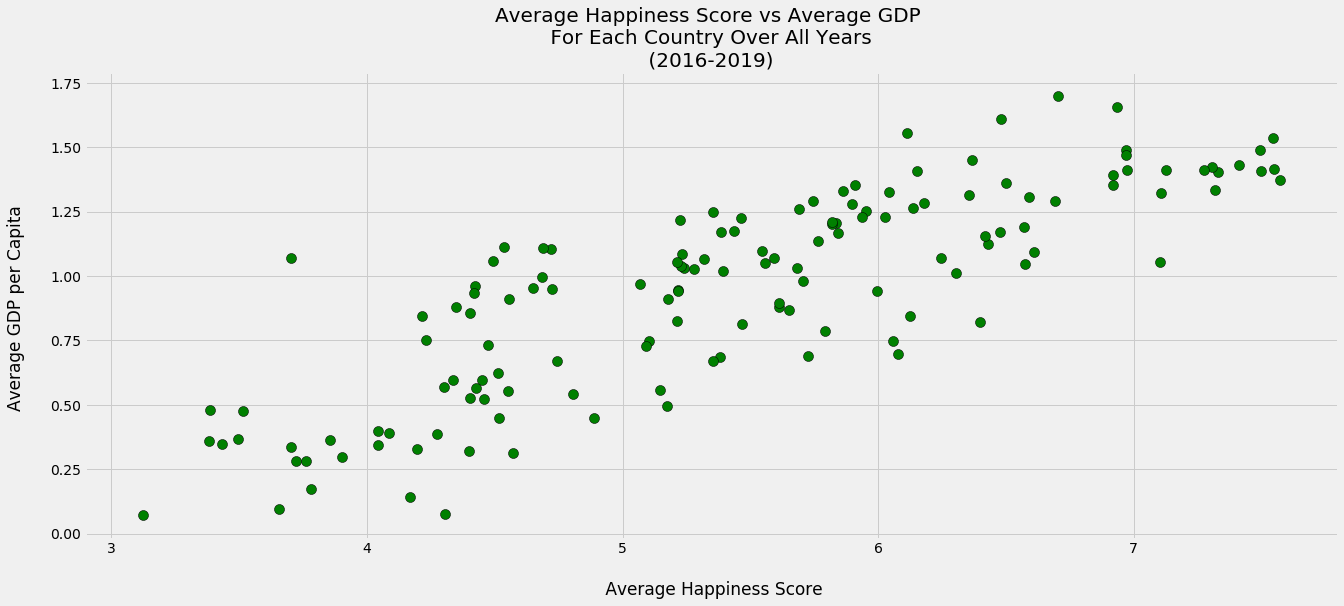

In [20]:
# Plotting GDP for 2016-2019 average 
x_values = avg_sixteen_nineteen_df["Happiness Score"]
y_values = avg_sixteen_nineteen_df["GDP per Capita"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,8))
plt.scatter(x_values,y_values, color="green", s=100, edgecolor="black")
# plt.plot(x_values,regress_values,"r-")
plt.xlabel(" \n Average Happiness Score", fontsize=17)
plt.ylabel("Average GDP per Capita \n ", fontsize=17)
plt.title("Average Happiness Score vs Average GDP \n For Each Country Over All Years \n (2016-2019) ", fontsize=20)
plt.savefig("gdp_1619.png")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.7753743955405615


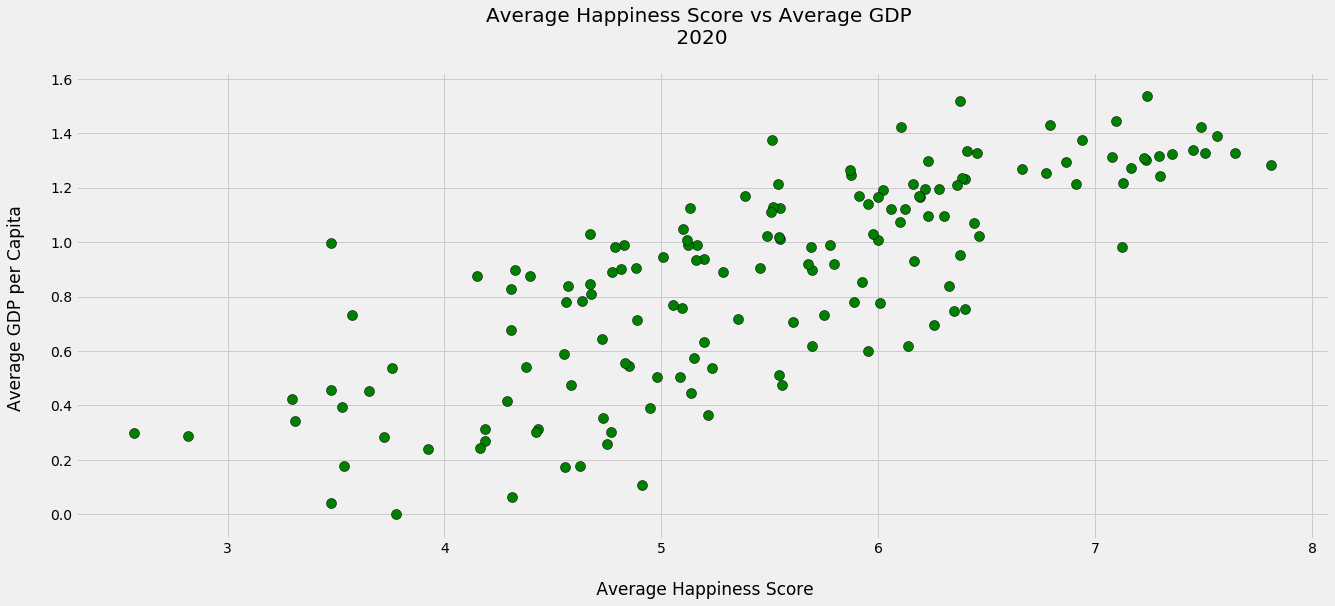

In [21]:
# Plotting GDP for 2020 average 
clean_data_2020_df

x_values = clean_data_2020_df["Happiness Score"]
y_values = clean_data_2020_df["GDP per Capita"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,8))
plt.scatter(x_values,y_values, color="green", s=100, edgecolor="black")
# plt.plot(x_values,regress_values,"r-")
plt.xlabel(" \n Average Happiness Score", fontsize=17)
plt.ylabel("Average GDP per Capita \n ", fontsize=17)
plt.title("Average Happiness Score vs Average GDP \n 2020 \n", fontsize=20)
plt.savefig("gdp_2020.png")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.779365947787852


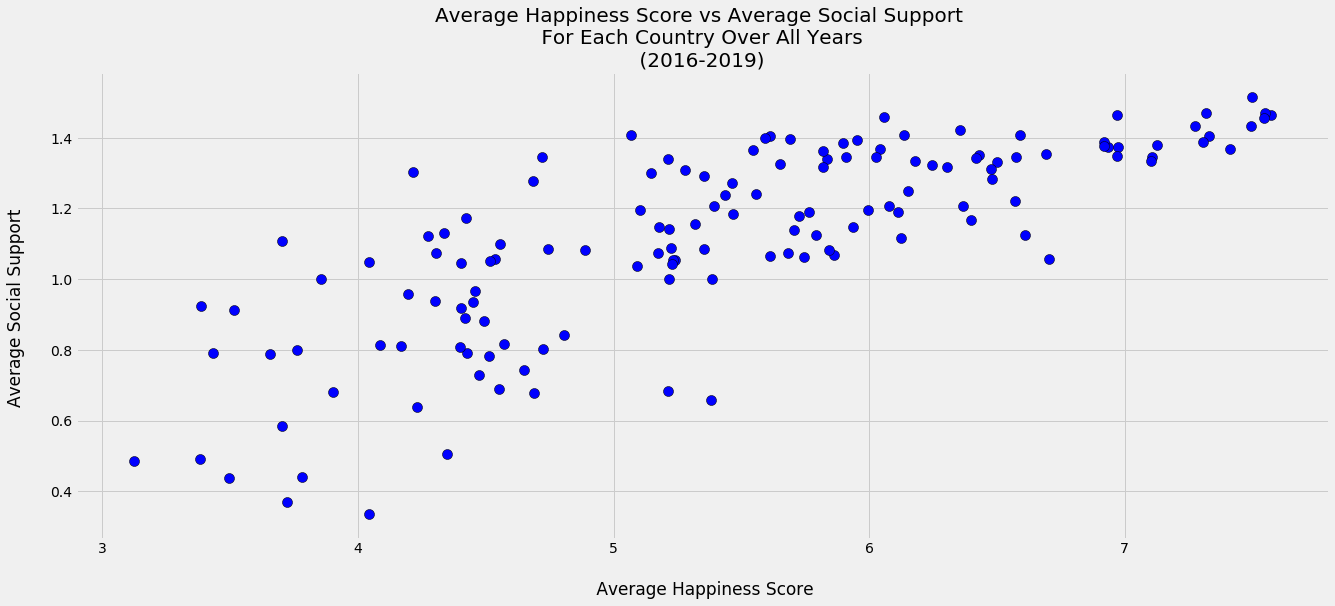

In [22]:
# Plotting Social Support for 2016-2019 average
x_values = avg_sixteen_nineteen_df["Happiness Score"]
y_values = avg_sixteen_nineteen_df["Social Support"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,8))
plt.scatter(x_values,y_values, color="blue", s=100, edgecolor="black")
# plt.plot(x_values,regress_values,"r-")
plt.xlabel(" \n Average Happiness Score", fontsize=17)
plt.ylabel("Average Social Support \n ", fontsize=17)
plt.title("Average Happiness Score vs Average Social Support \n For Each Country Over All Years \n (2016-2019) ", fontsize=20)
plt.savefig("social_support_1619.png")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.7650007537905114


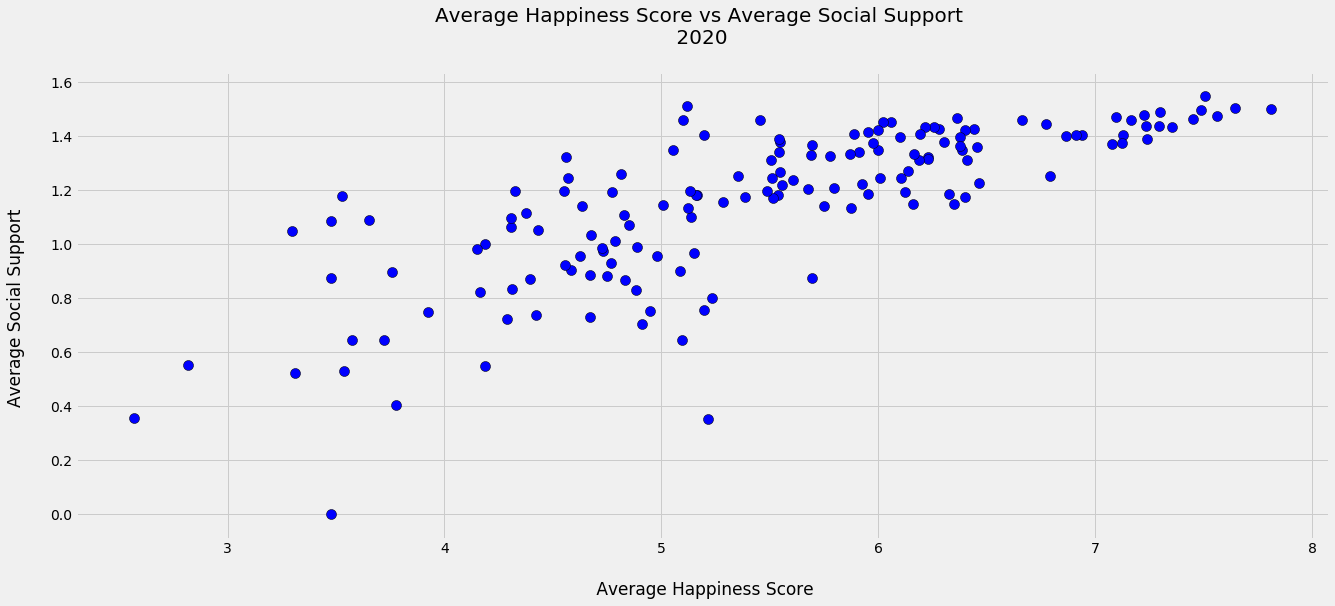

In [23]:
# Plotting Social Support for 2020 average 
x_values = clean_data_2020_df["Happiness Score"]
y_values = clean_data_2020_df["Social Support"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,8))
plt.scatter(x_values,y_values, color="blue", s=100, edgecolor="black")
# plt.plot(x_values,regress_values,"r-")
plt.xlabel(" \n Average Happiness Score", fontsize=17)
plt.ylabel("Average Social Support \n ", fontsize=17)
plt.title("Average Happiness Score vs Average Social Support \n 2020 \n ", fontsize=20)
plt.savefig("social_support_2020.png")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.7999962856546957


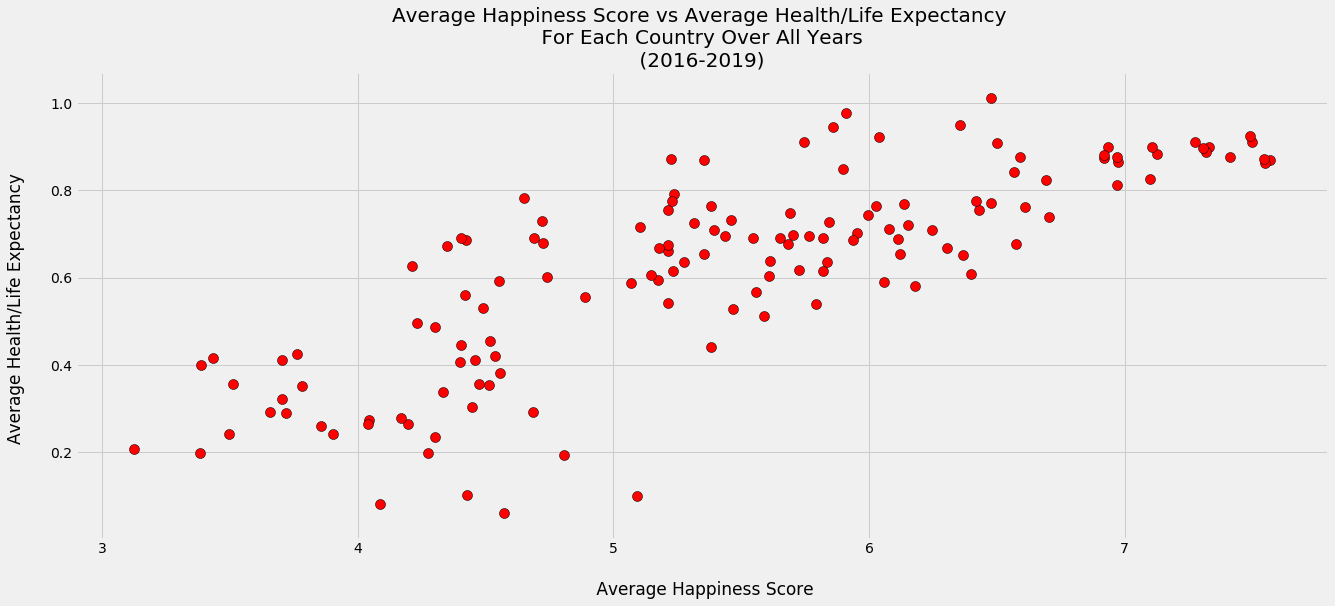

In [24]:
# Plotting Health/Life Expectancy for 2016-2019 average  
x_values = avg_sixteen_nineteen_df["Happiness Score"]
y_values = avg_sixteen_nineteen_df["Health/Life Expectancy"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,8))
plt.scatter(x_values,y_values, color="red", s=100, edgecolor="black")
# plt.plot(x_values,regress_values,"r-")
plt.xlabel(" \n Average Happiness Score", fontsize=17)
plt.ylabel("Average Health/Life Expectancy \n ", fontsize=17)
plt.title("Average Happiness Score vs Average Health/Life Expectancy \n For Each Country Over All Years \n (2016-2019) ", fontsize=20)
plt.savefig("health_1619.png")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.7703162873347793


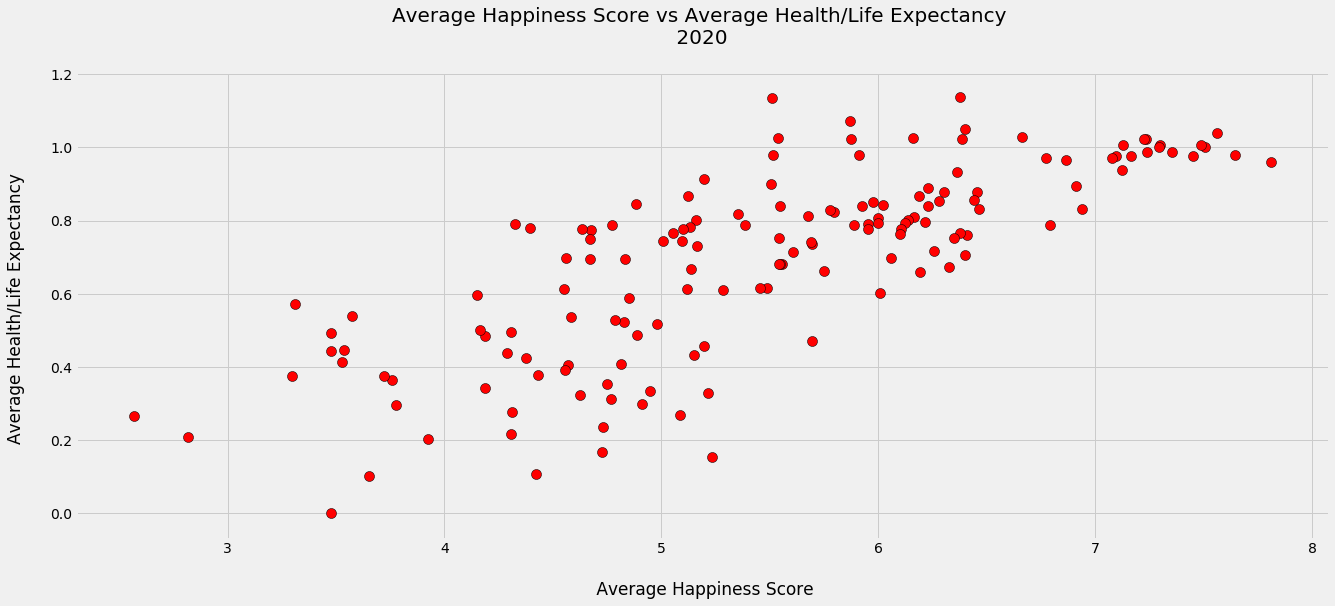

In [25]:
# Plotting Health/Life Expectancy for 2020 average 
x_values = clean_data_2020_df["Happiness Score"]
y_values = clean_data_2020_df["Health/Life Expectancy"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,8))
plt.scatter(x_values,y_values, color="red", s=100, edgecolor="black")
# plt.plot(x_values,regress_values,"r-")
plt.xlabel(" \n Average Happiness Score", fontsize=17)
plt.ylabel("Average Health/Life Expectancy \n ", fontsize=17)
plt.title("Average Happiness Score vs Average Health/Life Expectancy \n 2020 \n ", fontsize=20)
plt.savefig("health_2020.png")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.5696200202820731


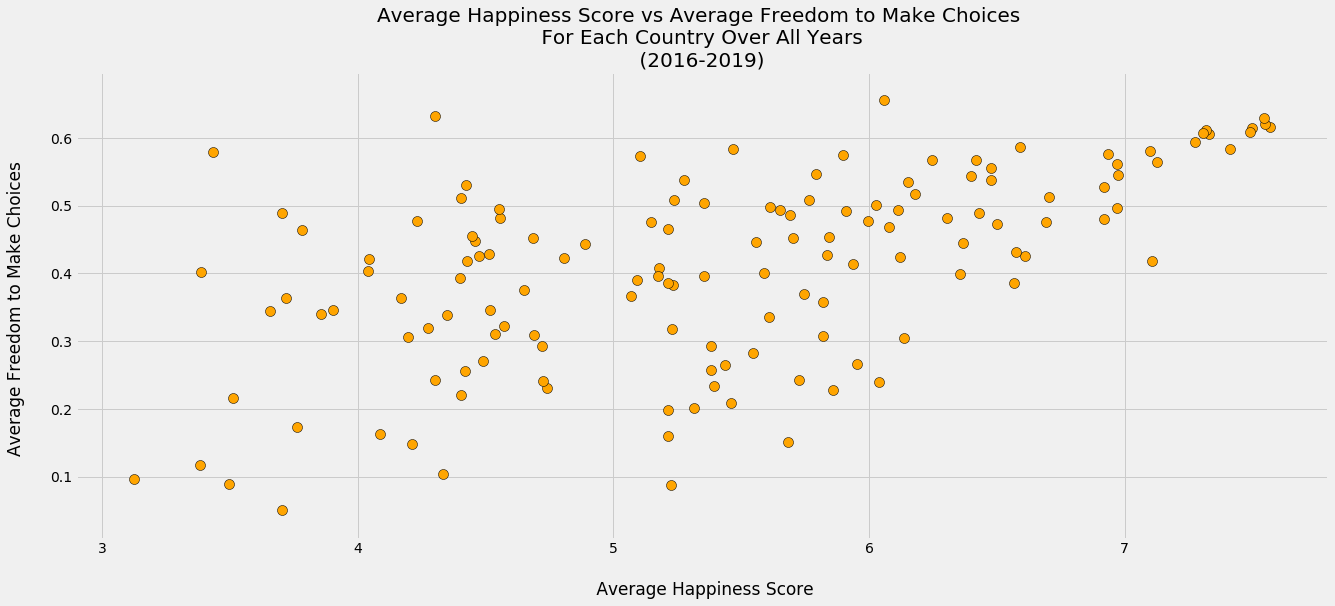

In [26]:
# Plotting Freedom to Make Choices for 2016-2019 average 
x_values = avg_sixteen_nineteen_df["Happiness Score"]
y_values = avg_sixteen_nineteen_df["Freedom to Make Choices"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,8))
plt.scatter(x_values,y_values, color="orange", s=100, edgecolor="black")
# plt.plot(x_values,regress_values,"r-")
plt.xlabel(" \n Average Happiness Score", fontsize=17)
plt.ylabel("Average Freedom to Make Choices \n ", fontsize=17)
plt.title("Average Happiness Score vs Average Freedom to Make Choices \n For Each Country Over All Years \n (2016-2019) ", fontsize=20)
plt.savefig("freedom_1619.png")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.5905967935165652


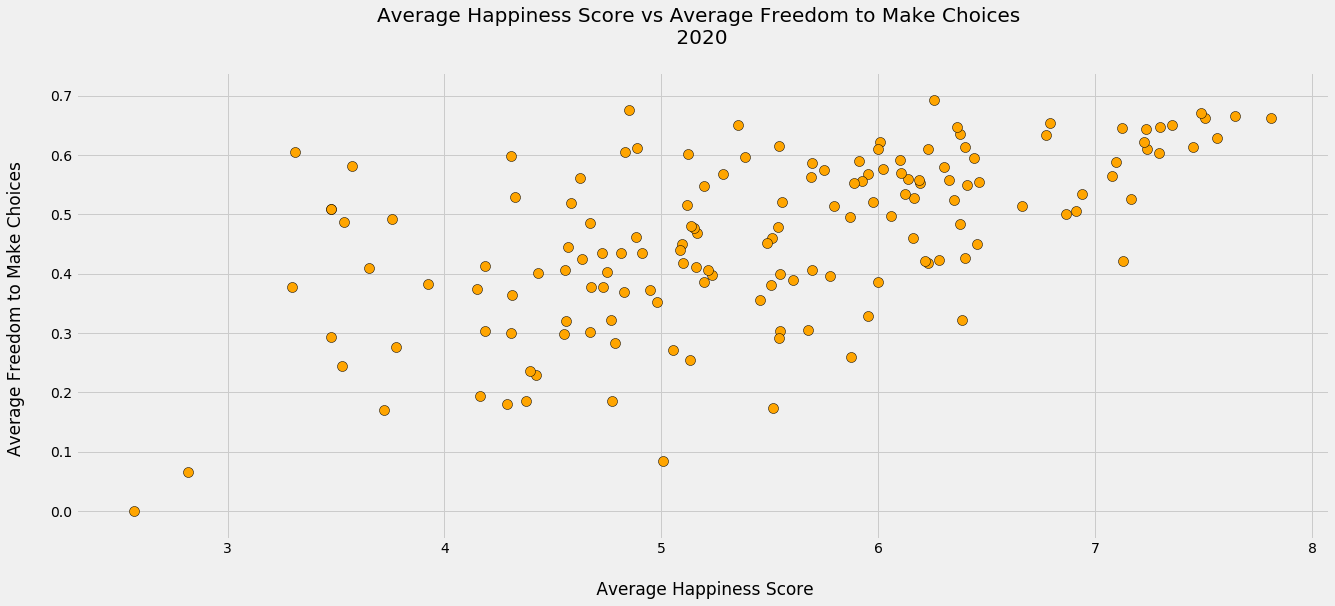

In [27]:
# Plotting Freedom to Make Choices for 2020 average 
x_values = clean_data_2020_df["Happiness Score"]
y_values = clean_data_2020_df["Freedom to Make Choices"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,8))
plt.scatter(x_values,y_values, color="orange", s=100, edgecolor="black")
# plt.plot(x_values,regress_values,"r-")
plt.xlabel(" \n Average Happiness Score", fontsize=17)
plt.ylabel("Average Freedom to Make Choices \n ", fontsize=17)
plt.title("Average Happiness Score vs Average Freedom to Make Choices \n 2020 \n  ", fontsize=20)
plt.savefig("freedom_2020.png")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.17221347179971333


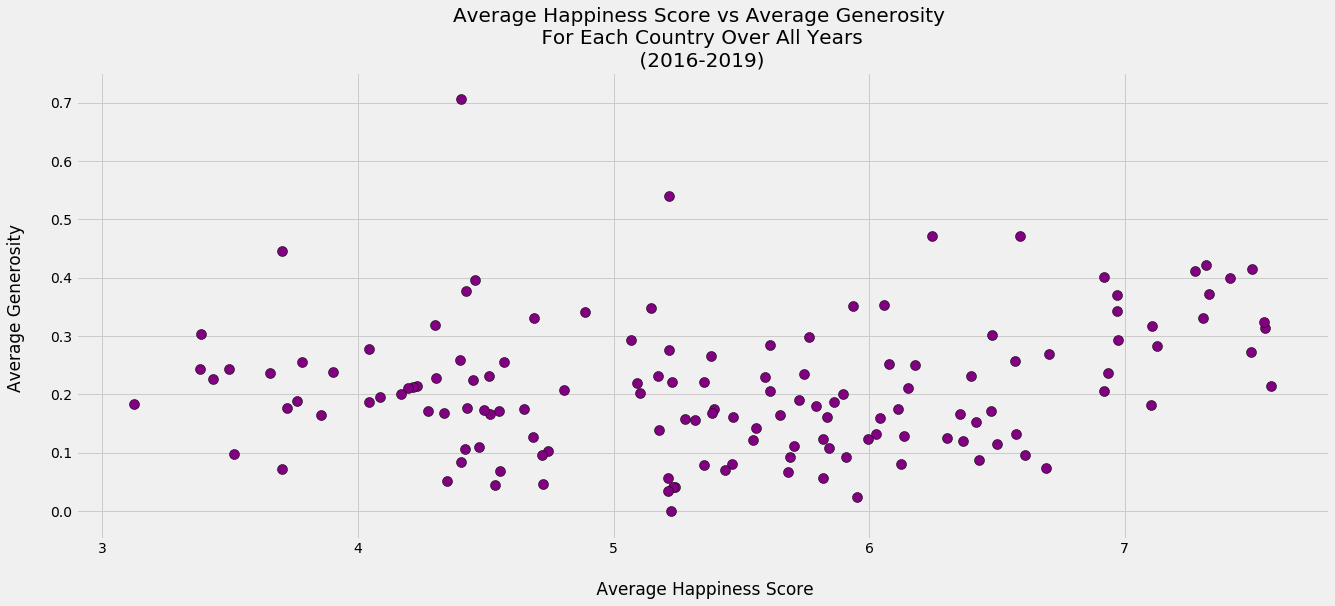

In [28]:
# Plotting Generosity for 2016-2019 average 
x_values = avg_sixteen_nineteen_df["Happiness Score"]
y_values = avg_sixteen_nineteen_df["Generosity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,8))
plt.scatter(x_values,y_values, color="purple", s=100, edgecolor="black")
# plt.plot(x_values,regress_values,"r-")
plt.xlabel(" \n Average Happiness Score", fontsize=17)
plt.ylabel("Average Generosity \n ", fontsize=17)
plt.title("Average Happiness Score vs Average Generosity \n For Each Country Over All Years \n (2016-2019) ", fontsize=20)
plt.savefig("generosity_1619.png")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.06904312848601243


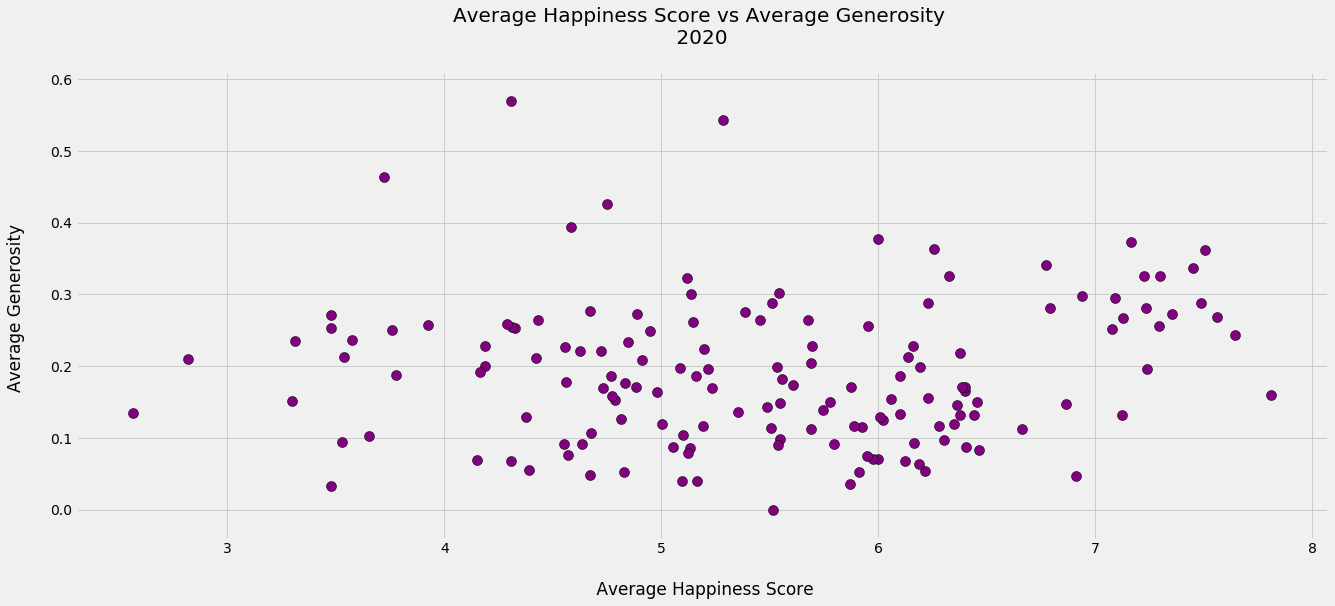

In [29]:
# Plotting Generosity for 2020 average 
x_values = clean_data_2020_df["Happiness Score"]
y_values = clean_data_2020_df["Generosity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,8))
plt.scatter(x_values,y_values, color="purple", s=100, edgecolor="black")
# plt.plot(x_values,regress_values,"r-")
plt.xlabel(" \n Average Happiness Score", fontsize=17)
plt.ylabel("Average Generosity \n ", fontsize=17)
plt.title("Average Happiness Score vs Average Generosity \n 2020 \n ", fontsize=20)
plt.savefig("generosity_2020.png")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.45873265185927936


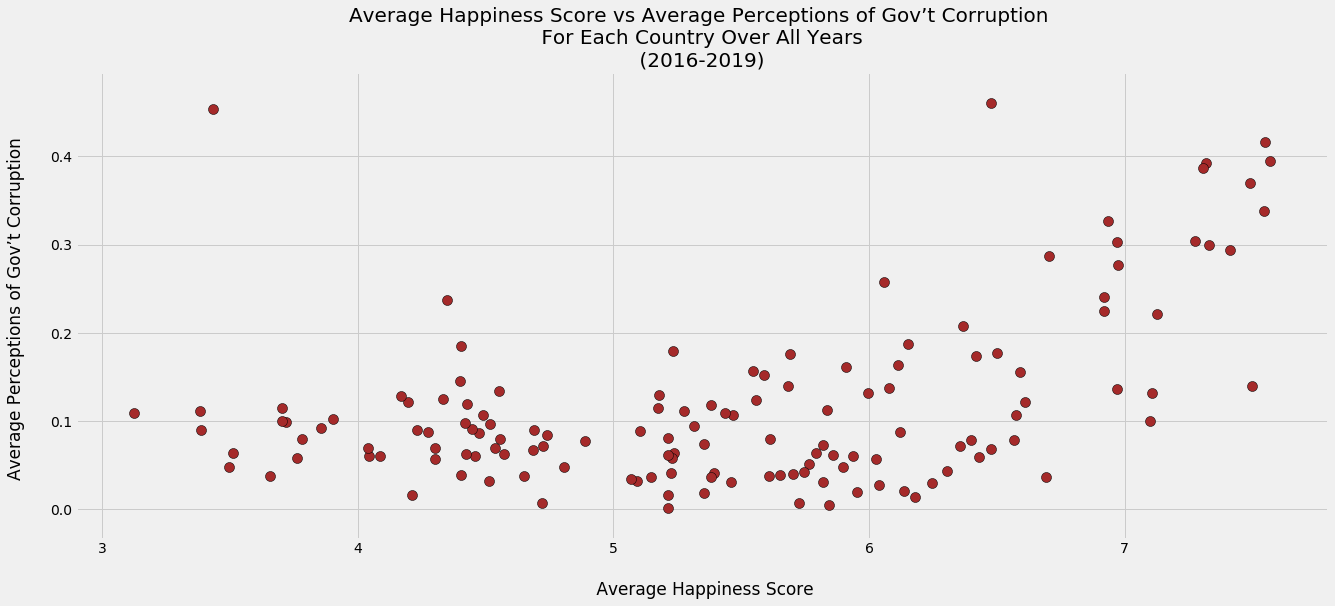

In [30]:
# Plotting Perceptions of Gov’t Corruption for 2016-2019 average 
x_values = avg_sixteen_nineteen_df["Happiness Score"]
y_values = avg_sixteen_nineteen_df["Perceptions of Gov’t Corruption"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,8))
plt.scatter(x_values,y_values, color="brown", s=100, edgecolor="black")
# plt.plot(x_values,regress_values,"r-")
plt.xlabel(" \n Average Happiness Score", fontsize=17)
plt.ylabel("Average Perceptions of Gov’t Corruption \n ", fontsize=17)
plt.title("Average Happiness Score vs Average Perceptions of Gov’t Corruption \n For Each Country Over All Years \n (2016-2019) ", fontsize=20)
plt.savefig("govt_1619.png")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.41830508270159683


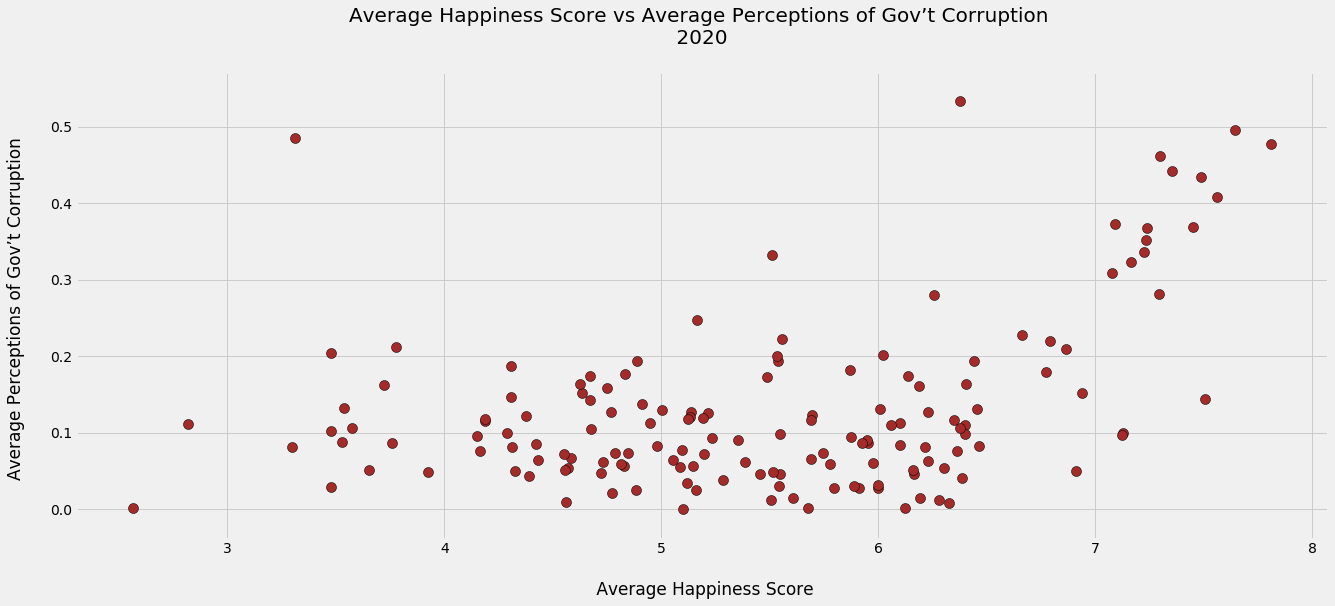

In [31]:
# Plotting Perceptions of Gov’t Corruption for 2020 average 
x_values = clean_data_2020_df["Happiness Score"]
y_values = clean_data_2020_df["Perceptions of Gov’t Corruption"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,8))
plt.scatter(x_values,y_values, color="brown", s=100, edgecolor="black")
# plt.plot(x_values,regress_values,"r-")
plt.xlabel(" \n Average Happiness Score", fontsize=17)
plt.ylabel("Average Perceptions of Gov’t Corruption \n ", fontsize=17)
plt.title("Average Happiness Score vs Average Perceptions of Gov’t Corruption \n 2020 \n ", fontsize=20)
plt.savefig("govt_2020.png")

print(f"The r-value is: {rvalue}")
plt.show()

In [32]:
avg_happiness_over_all_years.reset_index(inplace=True)

In [33]:
# Creating a tuple of all countries in the data in order to use for an API call
countries = tuple(avg_happiness_over_all_years['Country'])
countries

('Finland',
 'Denmark',
 'Norway',
 'Switzerland',
 'Iceland',
 'Netherlands',
 'Sweden',
 'New Zealand',
 'Canada',
 'Australia',
 'Austria',
 'Israel',
 'Costa Rica',
 'Ireland',
 'Luxembourg',
 'Germany',
 'United Kingdom',
 'United States',
 'Belgium',
 'Czech Republic',
 'United Arab Emirates',
 'Malta',
 'Mexico',
 'Brazil',
 'France',
 'Chile',
 'Singapore',
 'Panama',
 'Uruguay',
 'Guatemala',
 'Saudi Arabia',
 'Spain',
 'Argentina',
 'Colombia',
 'Thailand',
 'Trinidad and Tobago',
 'El Salvador',
 'Bahrain',
 'Slovakia',
 'Italy',
 'Kuwait',
 'Uzbekistan',
 'Nicaragua',
 'Poland',
 'Lithuania',
 'Slovenia',
 'Ecuador',
 'Japan',
 'Romania',
 'Kazakhstan',
 'South Korea',
 'Latvia',
 'Mauritius',
 'Malaysia',
 'Cyprus',
 'Bolivia',
 'Russia',
 'Estonia',
 'Kosovo',
 'Peru',
 'Moldova',
 'Jamaica',
 'Paraguay',
 'Philippines',
 'Hungary',
 'Algeria',
 'Libya',
 'Belarus',
 'Turkmenistan',
 'Honduras',
 'Serbia',
 'Portugal',
 'Pakistan',
 'Croatia',
 'Turkey',
 'Montenegro',
 '

In [34]:
# Using a for loop to extract the latitude and longitude for each country using Google Geocode API
latitude = []
longitude = []

for country in countries:
    base_url = "https://maps.googleapis.com/maps/api/geocode/json?"
    
    params = {"address": country, 
             "key": g_key}
    
    
    # Assemble url and make API request
    response = requests.get(base_url, params=params).json()
    
   # Extract results
    results = response["results"]
    latitude.append(results[0]["geometry"]["location"]["lat"])
    longitude.append(results[0]["geometry"]["location"]["lng"])

In [35]:
# Adding geolocation to a dataframe so that it may be used to place country markers
gmaps_df = avg_happiness_over_all_years
gmaps_df["Location"] = list(zip(latitude, longitude))
gmaps_df

,Country,Happiness Score,GDP per Capita,Social Support,Health/Life Expectancy,Freedom to Make Choices,Generosity,Perceptions of Gov’t Corruption,Year,Location
0,Finland,7.61834,1.355948,1.470683,0.888268,0.625662,0.203015,0.411302,2018,"(61.92410999999999, 25.7481511)"
1,Denmark,7.56972,1.397022,1.476262,0.886188,0.629091,0.299157,0.431712,2018,"(56.26392, 9.501785)"
2,Norway,7.53420,1.512422,1.463919,0.897906,0.638143,0.317189,0.357765,2018,"(60.47202399999999, 8.468945999999999)"
3,Switzerland,7.50598,1.471017,1.441911,0.948139,0.613319,0.271887,0.377397,2018,"(46.818188, 8.227511999999999)"
4,Iceland,7.49970,1.391359,1.521880,0.928345,0.624677,0.404330,0.140763,2018,"(64.963051, -19.020835)"
...,...,...,...,...,...,...,...,...,...,...
136,Rwanda,3.40806,0.346290,0.738289,0.446292,0.584026,0.228196,0.460194,2018,"(-1.940278, 29.873888)"
137,Tanzania,3.40504,0.474170,0.913379,0.408837,0.422992,0.297303,0.112981,2018,"(-6.369028, 34.888822)"
138,Afghanistan,3.31118,0.353291,0.420469,0.247248,0.071096,0.221757,0.038901,2018,"(33.93911, 67.709953)"
139,South Sudan,3.26932,0.344654,0.504558,0.200421,0.106258,0.236119,0.111020,2018,"(6.876991899999999, 31.3069788)"


In [36]:
# Using gmaps to place markers for the Top 10 and Bottom 10 countries
gmaps.configure(api_key=g_key)

In [38]:
top_5_happy_countries = [
{'name': 'Finland', 'location': (61.92410999999999, 25.7481511), 'happy': 1},
{'name': 'Denmark', 'location': (56.26392, 9.501785), 'happy': 2},
{'name': 'Norway', 'location': (60.47202399999999, 8.468945999999999), 'happy': 3},
{'name': 'Switzerland', 'location': (46.818188, 8.227511999999999), 'happy': 4},
{'name': 'Tihange', 'location': (64.963051, -19.020835), 'happy': 5}
]
happiest_locations = [happy['location'] for happy in top_5_happy_countries]
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>Happiest Country</dt><dd>{happy}</dd>
</dl>
"""
happy_info = [info_box_template.format(**happy) for happy in top_5_happy_countries ]
marker_layer = gmaps.marker_layer(happiest_locations, info_box_content=happy_info)
fig = gmaps.figure()
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
top_5_unhappy_countries = [
{'name': 'Rwanda', 'location': (-1.940278, 29.873888), 'unhappy': 5},
{'name': 'Tanzania', 'location': (-6.369028, 34.888822), 'unhappy': 4},
{'name': 'Afghanistan', 'location': (33.93911, 67.709953), 'unhappy': 3},
{'name': 'South Sudan', 'location': (6.876991899999999, 31.3069788), 'unhappy': 2},
{'name': 'Burundi', 'location': (-3.373056, 29.918886), 'unhappy': 1}
]
unhappiest_locations = [unhappy['location'] for unhappy in top_5_unhappy_countries]
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>Unhappiest Country</dt><dd>{unhappy}</dd>
</dl>
"""
unhappy_info = [info_box_template.format(**unhappy) for unhappy in top_5_unhappy_countries]
marker_layer = gmaps.marker_layer(unhappiest_locations, info_box_content=unhappy_info)
fig = gmaps.figure()
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))